In [1]:
# Load library
library(ggplot2)
library(dplyr)
library(corrplot)
library(car)
library(leaps)
library(GGally)
library(tidyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
# Load data
white=read.csv("winequality-white.csv", sep = ";")
head(white)

fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1 7.0           0.27             0.36        20.7           0.045    
2 6.3           0.30             0.34         1.6           0.049    
3 8.1           0.28             0.40         6.9           0.050    
4 7.2           0.23             0.32         8.5           0.058    
5 7.2           0.23             0.32         8.5           0.058    
6 8.1           0.28             0.40         6.9           0.050    
  free.sulfur.dioxide total.sulfur.dioxide density pH   sulphates alcohol
1 45                  170                  1.0010  3.00 0.45       8.8   
2 14                  132                  0.9940  3.30 0.49       9.5   
3 30                   97                  0.9951  3.26 0.44      10.1   
4 47                  186                  0.9956  3.19 0.40       9.9   
5 47                  186                  0.9956  3.19 0.40       9.9   
6 30                   97                  0.9951  3.26 0.44      10.1   
  quality
1 6      
2 6      
3 6      
4 6      
5 6      
6 6

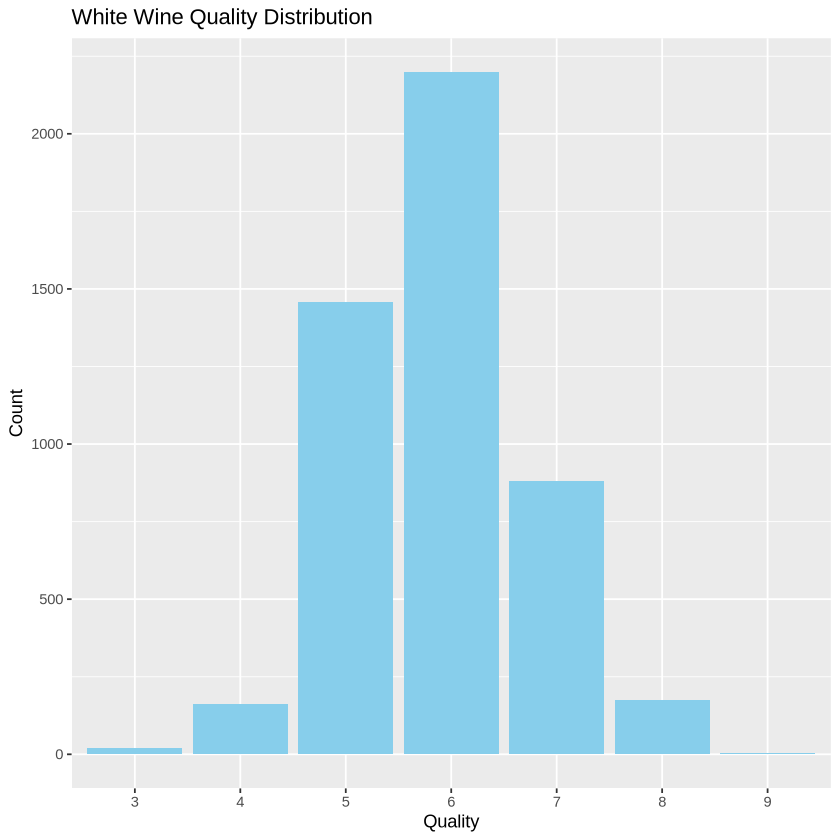

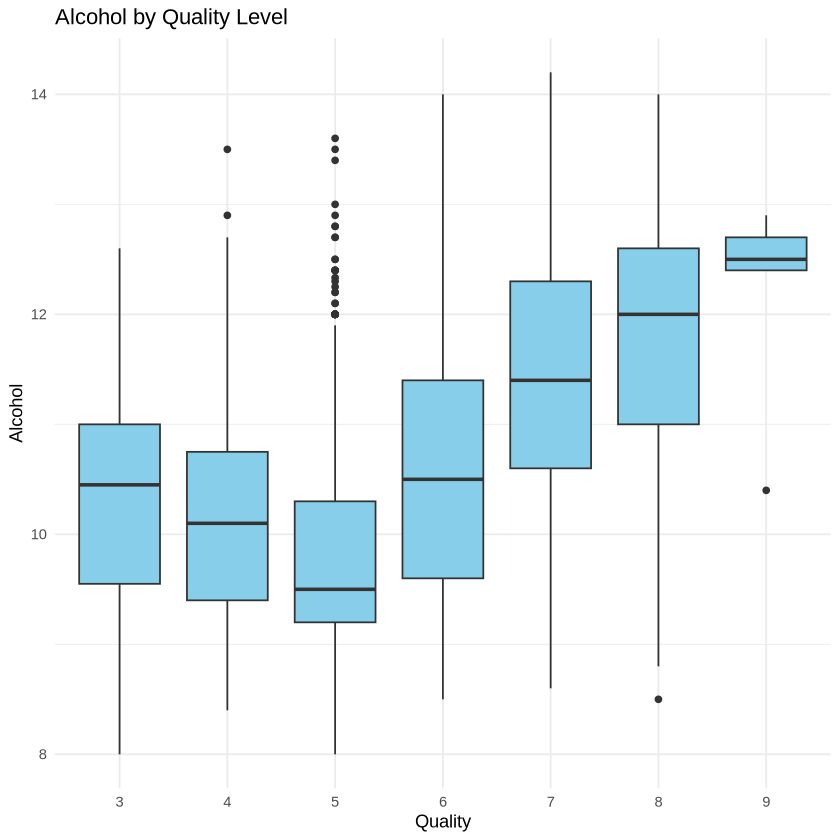

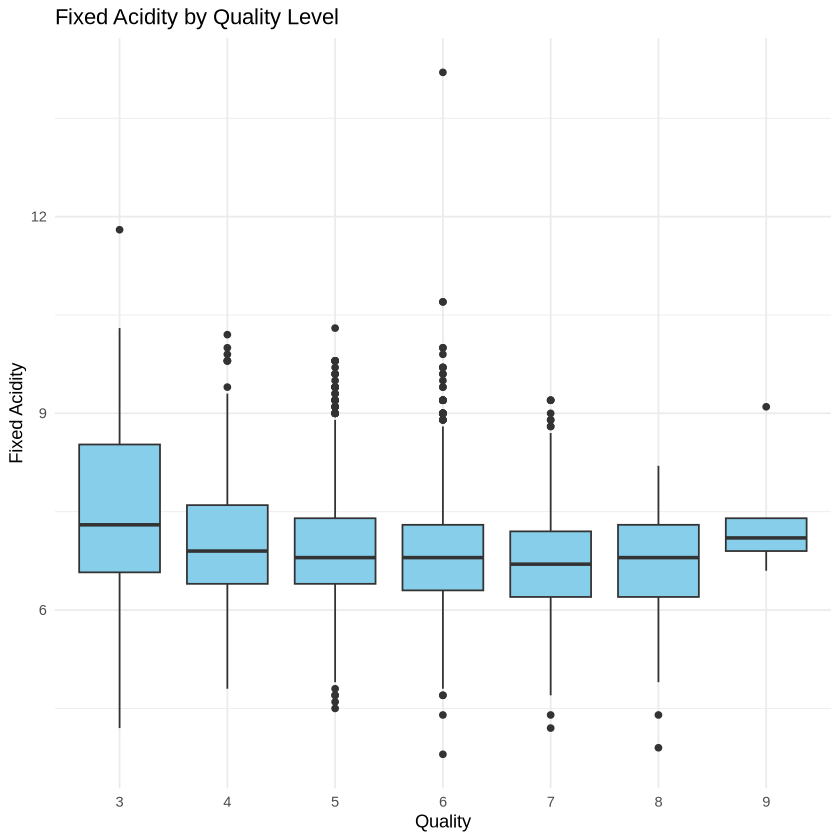

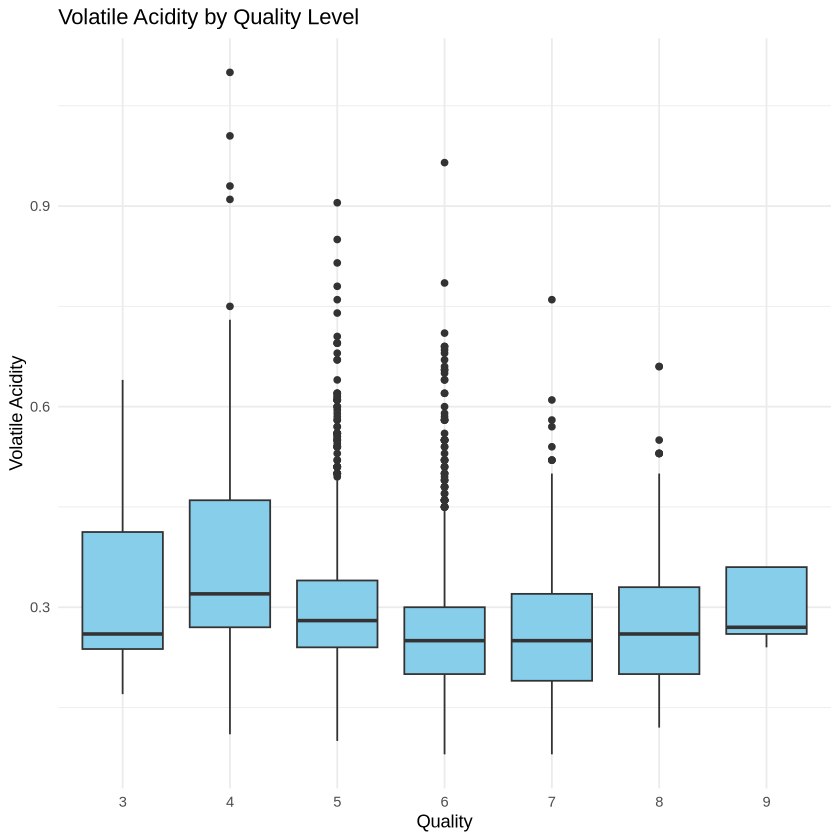

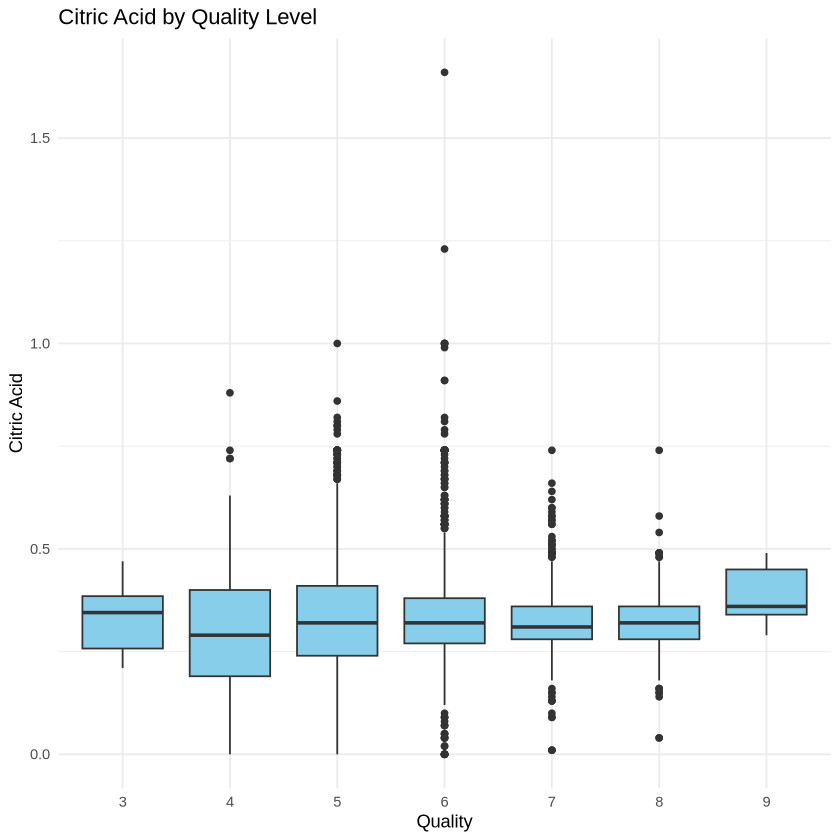

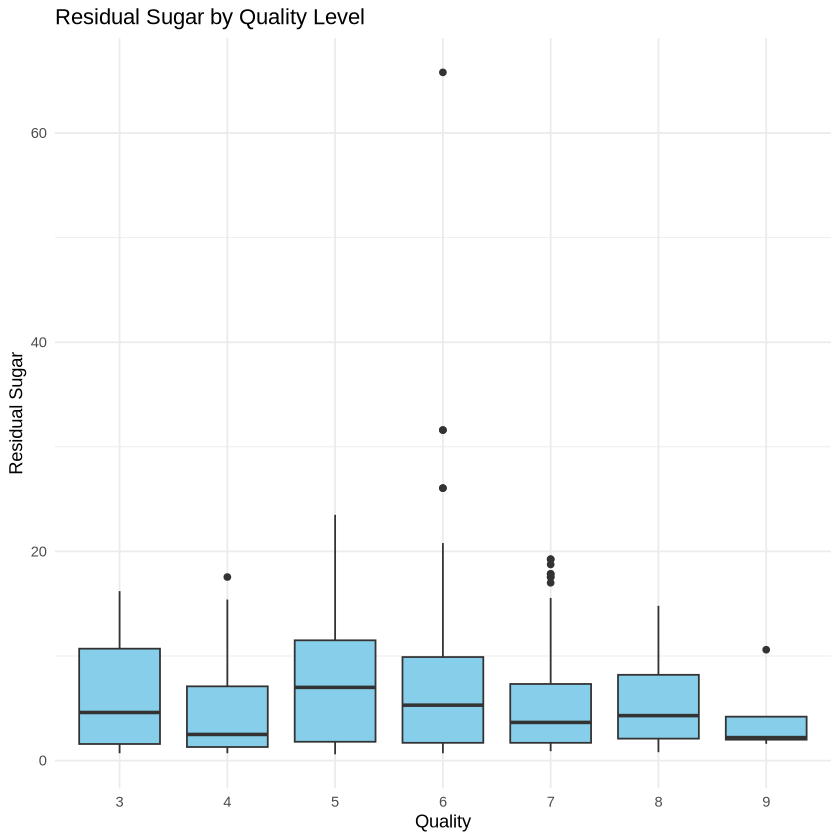

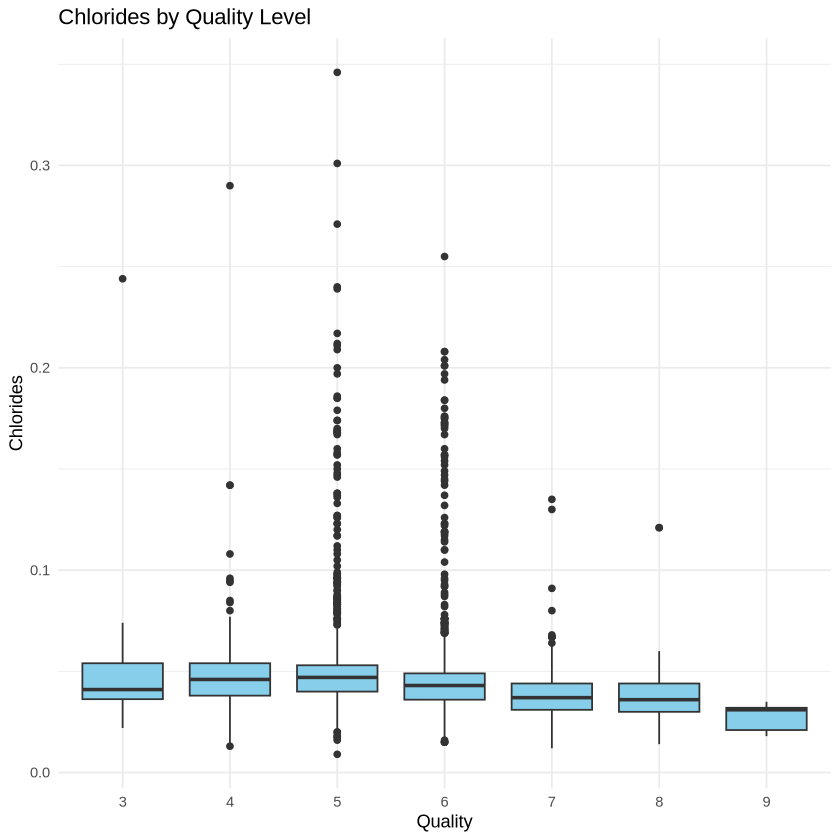

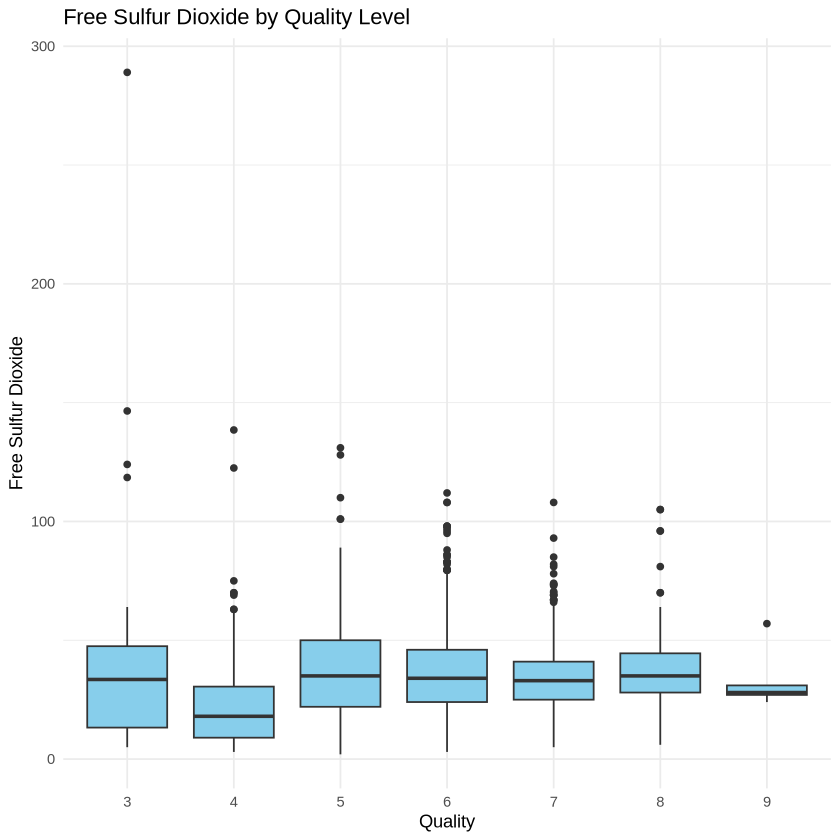

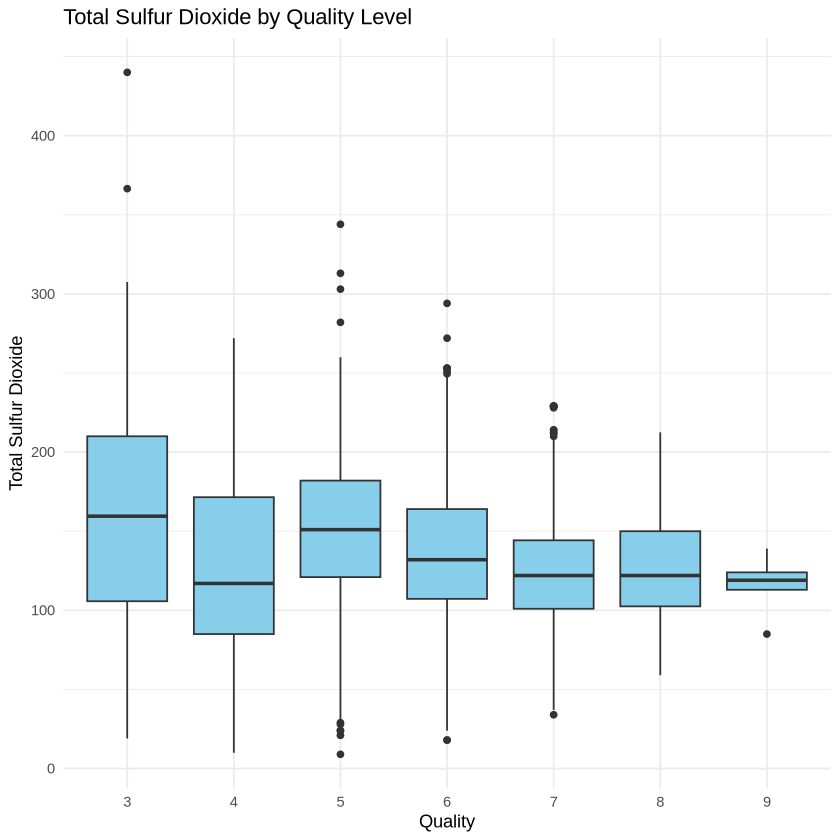

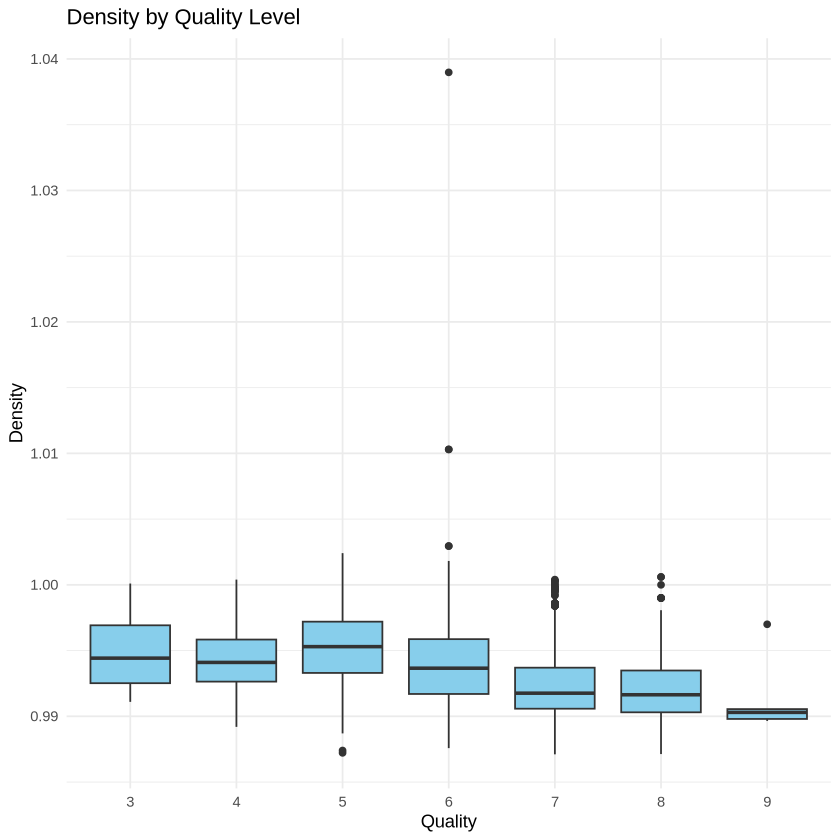

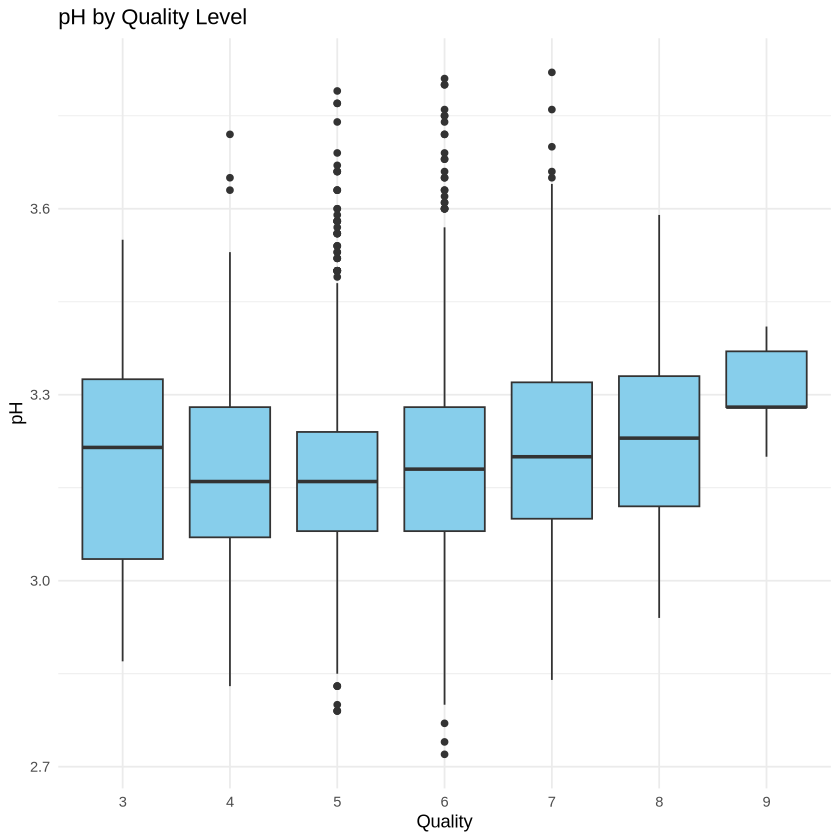

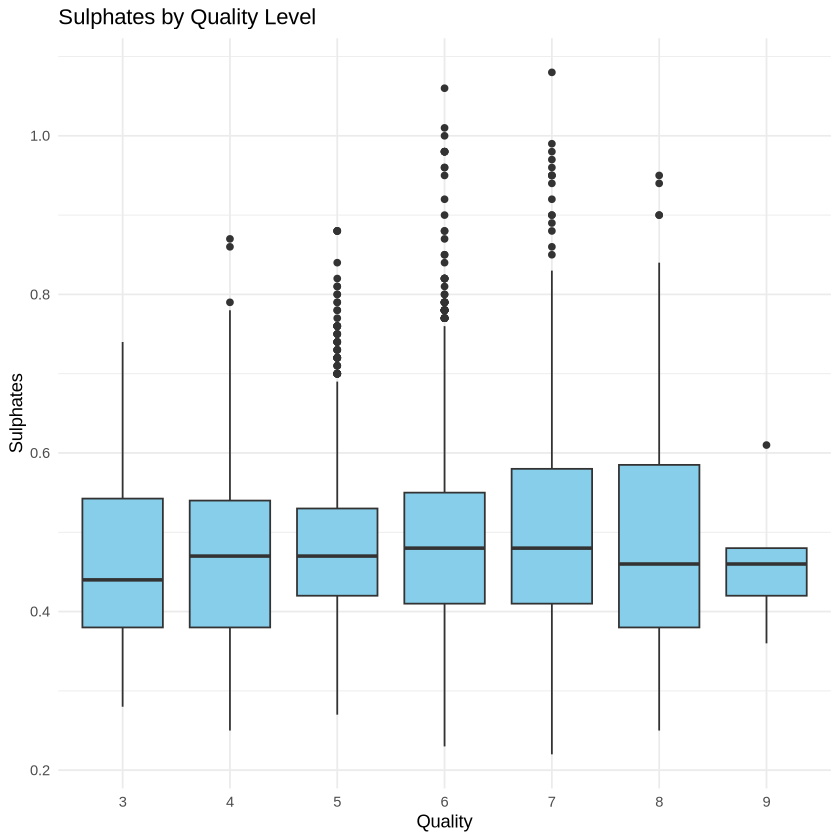

In [3]:
# EDA plots

# Response
ggplot(white, aes(x = factor(quality))) +
  geom_bar(fill = "skyblue") +
  labs(title = "White Wine Quality Distribution", x = "Quality", y = "Count")

# Covariate
ggplot(white, aes(x = factor(quality), y = alcohol)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Alcohol by Quality Level", x = "Quality", y = "Alcohol") +
  theme_minimal()

ggplot(white, aes(x = factor(quality), y = fixed.acidity)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Fixed Acidity by Quality Level", x = "Quality", y = "Fixed Acidity") +
  theme_minimal()

ggplot(white, aes(x = factor(quality), y = volatile.acidity)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Volatile Acidity by Quality Level", x = "Quality", y = "Volatile Acidity") +
  theme_minimal()

ggplot(white, aes(x = factor(quality), y = citric.acid)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Citric Acid by Quality Level", x = "Quality", y = "Citric Acid") +
  theme_minimal()

ggplot(white, aes(x = factor(quality), y = residual.sugar)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Residual Sugar by Quality Level", x = "Quality", y = "Residual Sugar") +
  theme_minimal()

ggplot(white, aes(x = factor(quality), y = chlorides)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Chlorides by Quality Level", x = "Quality", y = "Chlorides") +
  theme_minimal()

ggplot(white, aes(x = factor(quality), y = free.sulfur.dioxide)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Free Sulfur Dioxide by Quality Level", x = "Quality", y = "Free Sulfur Dioxide") +
  theme_minimal()

ggplot(white, aes(x = factor(quality), y = total.sulfur.dioxide)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Total Sulfur Dioxide by Quality Level", x = "Quality", y = "Total Sulfur Dioxide") +
  theme_minimal()

ggplot(white, aes(x = factor(quality), y = density)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Density by Quality Level", x = "Quality", y = "Density") +
  theme_minimal()

ggplot(white, aes(x = factor(quality), y = pH)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "pH by Quality Level", x = "Quality", y = "pH") +
  theme_minimal()

ggplot(white, aes(x = factor(quality), y = sulphates)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Sulphates by Quality Level", x = "Quality", y = "Sulphates") +
  theme_minimal()

In [4]:
# EDA part 2
summary(white)

# Check missing values
sum(is.na(white))

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.700  
 Median : 6.800   Median :0.2600   Median :0.3200   Median : 5.200  
 Mean   : 6.855   Mean   :0.2782   Mean   :0.3342   Mean   : 6.391  
 3rd Qu.: 7.300   3rd Qu.:0.3200   3rd Qu.:0.3900   3rd Qu.: 9.900  
 Max.   :14.200   Max.   :1.1000   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  2.00      Min.   :  9.0        Min.   :0.9871  
 1st Qu.:0.03600   1st Qu.: 23.00      1st Qu.:108.0        1st Qu.:0.9917  
 Median :0.04300   Median : 34.00      Median :134.0        Median :0.9937  
 Mean   :0.04577   Mean   : 35.31      Mean   :138.4        Mean   :0.9940  
 3rd Qu.:0.05000   3rd Qu.: 46.00      3rd Qu.:167.0        3rd Qu.:0.9961  
 Max.   :0.34600   Max.   :289.00      Max.   :440.0   

[1] 0

In [5]:
# Multicollinearity check
lm_full <- lm(quality ~ alcohol + fixed.acidity + volatile.acidity + citric.acid + residual.sugar + chlorides +
                 free.sulfur.dioxide + total.sulfur.dioxide + density + pH+sulphates, data = white)
vif_values <- vif(lm_full)
print(vif_values)

             alcohol        fixed.acidity     volatile.acidity 
            7.706957             2.691435             1.141156 
         citric.acid       residual.sugar            chlorides 
            1.165215            12.644064             1.236822 
 free.sulfur.dioxide total.sulfur.dioxide              density 
            1.787880             2.239233            28.232546 
                  pH            sulphates 
            2.196362             1.138540 


In [6]:
# After reduce density
lm_without_density <- lm(quality ~ alcohol + fixed.acidity + volatile.acidity + citric.acid + chlorides +residual.sugar+
                 free.sulfur.dioxide + total.sulfur.dioxide + pH+sulphates, data = white)
vif_values2 <- vif(lm_without_density)
print(vif_values2)

             alcohol        fixed.acidity     volatile.acidity 
            1.647117             1.356128             1.128298 
         citric.acid            chlorides       residual.sugar 
            1.159884             1.203645             1.435215 
 free.sulfur.dioxide total.sulfur.dioxide                   pH 
            1.744627             2.153170             1.330912 
           sulphates 
            1.056637 


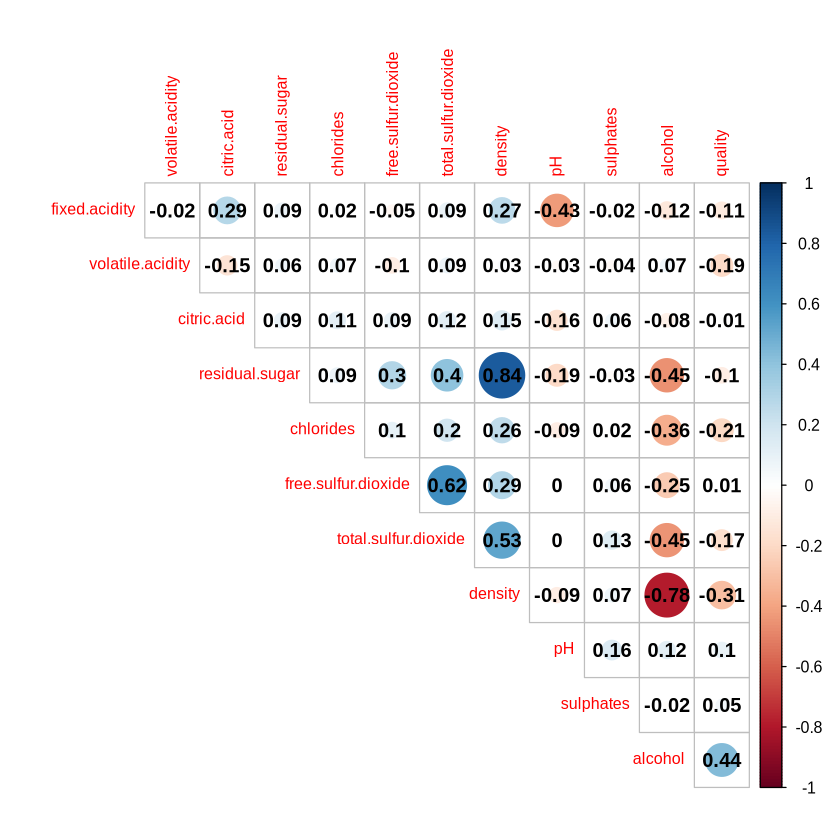

In [7]:
# Corrlation plot
cor_matrix <- cor(white[, sapply(white, is.numeric)])
corrplot(cor_matrix, method = "circle", type = "upper", 
         tl.cex = 0.8, # Text label size
         addCoef.col = "black", # Add correlation coefficients on the plot
         diag = FALSE) # Hide the diagonal values

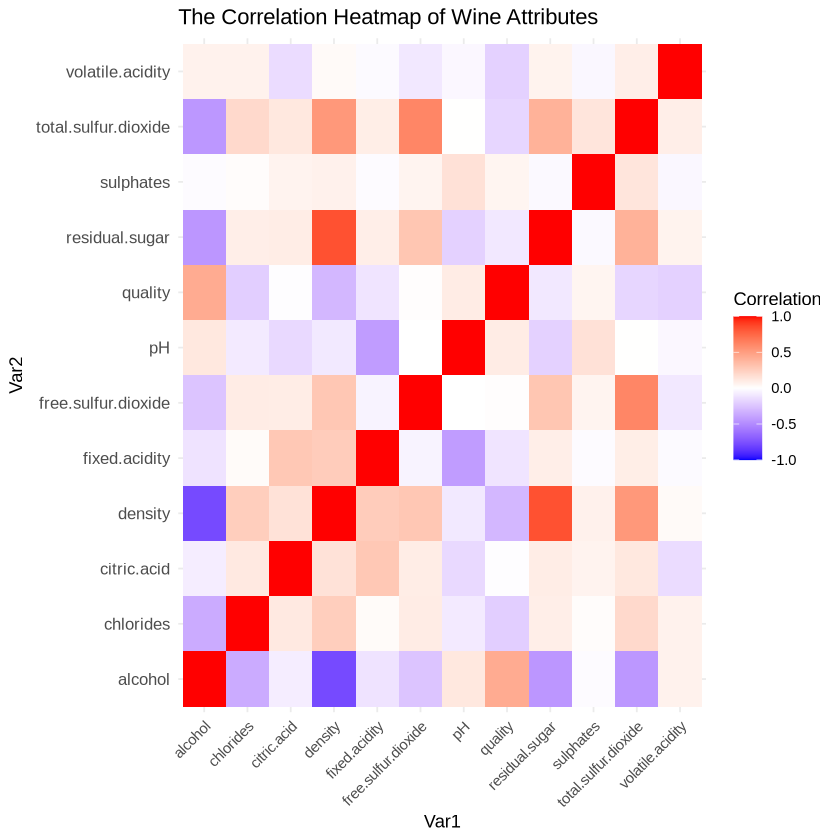

In [8]:
cor_df <- as.data.frame(cor_matrix) %>%
  rownames_to_column(var = "Var1") %>%
  pivot_longer(-Var1, names_to = "Var2", values_to = "value")

# Plot heatmap
ggplot(cor_df, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1, 1), space = "Lab",
                       name = "Correlation") +
  theme_minimal() +
  labs(title = "The Correlation Heatmap of Wine Attributes") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
        axis.text.y = element_text(size = 10))

In [9]:
# Remove density since multicollinearity issue
white <- subset(white, select = -density)

# Model with only intercept 
empty_model <- lm(quality ~ 1, data = white)

# Full model (with all predictors)
full_model <- lm(quality ~ ., data = white)

In [10]:
# Perform forward selection
forward_model <- step(empty_model, scope = formula(full_model), direction = "forward")

Start:  AIC=-1188.69
quality ~ 1

                       Df Sum of Sq    RSS     AIC
+ alcohol               1    728.73 3112.3 -2217.1
+ chlorides             1    169.28 3671.7 -1407.5
+ volatile.acidity      1    145.64 3695.4 -1376.0
+ total.sulfur.dioxide  1    117.28 3723.7 -1338.6
+ fixed.acidity         1     49.62 3791.4 -1250.4
+ pH                    1     37.97 3803.0 -1235.3
+ residual.sugar        1     36.57 3804.4 -1233.5
+ sulphates             1     11.07 3829.9 -1200.8
<none>                              3841.0 -1188.7
+ citric.acid           1      0.33 3840.7 -1187.1
+ free.sulfur.dioxide   1      0.26 3840.7 -1187.0

Step:  AIC=-2217.14
quality ~ alcohol

                       Df Sum of Sq    RSS     AIC
+ volatile.acidity      1   193.992 2918.3 -2530.4
+ free.sulfur.dioxide   1    56.181 3056.1 -2304.4
+ residual.sugar        1    46.959 3065.3 -2289.6
+ fixed.acidity         1    14.509 3097.8 -2238.0
+ sulphates             1    14.424 3097.8 -2237.9
+ chlori

In [11]:
# Perform backward selection
backward_model <- step(full_model, direction = "backward")

Start:  AIC=-2728.61
quality ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + 
    chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    pH + sulphates + alcohol

                       Df Sum of Sq    RSS     AIC
- citric.acid           1      0.05 2793.4 -2730.5
<none>                              2793.4 -2728.6
- chlorides             1      1.76 2795.1 -2727.5
- pH                    1      2.29 2795.7 -2726.6
- total.sulfur.dioxide  1      3.11 2796.5 -2725.2
- fixed.acidity         1      6.51 2799.9 -2719.2
- sulphates             1     10.61 2804.0 -2712.0
- free.sulfur.dioxide   1     18.45 2811.8 -2698.4
- residual.sugar        1     57.72 2851.1 -2630.4
- volatile.acidity      1    169.11 2962.5 -2442.7
- alcohol               1    592.29 3385.7 -1788.7

Step:  AIC=-2730.51
quality ~ fixed.acidity + volatile.acidity + residual.sugar + 
    chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    pH + sulphates + alcohol

                      

In [12]:
# Stepwise selection: both forward and backward
stepwise_model <- step(empty_model, 
                       scope = formula(full_model), 
                       direction = "both")

Start:  AIC=-1188.69
quality ~ 1

                       Df Sum of Sq    RSS     AIC
+ alcohol               1    728.73 3112.3 -2217.1
+ chlorides             1    169.28 3671.7 -1407.5
+ volatile.acidity      1    145.64 3695.4 -1376.0
+ total.sulfur.dioxide  1    117.28 3723.7 -1338.6
+ fixed.acidity         1     49.62 3791.4 -1250.4
+ pH                    1     37.97 3803.0 -1235.3
+ residual.sugar        1     36.57 3804.4 -1233.5
+ sulphates             1     11.07 3829.9 -1200.8
<none>                              3841.0 -1188.7
+ citric.acid           1      0.33 3840.7 -1187.1
+ free.sulfur.dioxide   1      0.26 3840.7 -1187.0

Step:  AIC=-2217.14
quality ~ alcohol

                       Df Sum of Sq    RSS     AIC
+ volatile.acidity      1    193.99 2918.3 -2530.4
+ free.sulfur.dioxide   1     56.18 3056.1 -2304.4
+ residual.sugar        1     46.96 3065.3 -2289.6
+ fixed.acidity         1     14.51 3097.7 -2238.0
+ sulphates             1     14.42 3097.8 -2237.9
+ chlori

In [13]:
# Extract R² and Adjusted R² from each model
model_names <- c("Forward", "Backward", "Stepwise", "Full")
r_squared <- c(summary(forward_model)$r.squared,
               summary(backward_model)$r.squared,
               summary(stepwise_model)$r.squared,
               summary(full_model)$r.squared)

adj_r_squared <- c(summary(forward_model)$adj.r.squared,
                   summary(backward_model)$adj.r.squared,
                   summary(stepwise_model)$adj.r.squared,
                   summary(full_model)$adj.r.squared)

# Create a data frame for easy viewing
comparison_table <- data.frame(
  Model = model_names,
  R_squared = round(r_squared, 4),
  Adjusted_R_squared = round(adj_r_squared, 4)
)

# View the table
print(comparison_table)

     Model R_squared Adjusted_R_squared
1  Forward    0.2727             0.2714
2 Backward    0.2727             0.2714
3 Stepwise    0.2727             0.2714
4     Full    0.2727             0.2713


In [14]:
summary(forward_model)
summary(backward_model)
summary(stepwise_model)
# The result shows they all selected the same model


Call:
lm(formula = quality ~ alcohol + volatile.acidity + residual.sugar + 
    free.sulfur.dioxide + fixed.acidity + sulphates + total.sulfur.dioxide + 
    pH + chlorides, data = white)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9047 -0.4955 -0.0326  0.4665  3.1773 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.0614535  0.3481242   5.922 3.41e-09 ***
alcohol               0.3624430  0.0112353  32.259  < 2e-16 ***
volatile.acidity     -1.9525976  0.1122337 -17.398  < 2e-16 ***
residual.sugar        0.0256013  0.0025477  10.049  < 2e-16 ***
free.sulfur.dioxide   0.0047606  0.0008387   5.676 1.46e-08 ***
fixed.acidity        -0.0513991  0.0144704  -3.552 0.000386 ***
sulphates             0.4175446  0.0971172   4.299 1.75e-05 ***
total.sulfur.dioxide -0.0008759  0.0003724  -2.352 0.018722 *  
pH                    0.1664518  0.0824241   2.019 0.043494 *  
chlorides            -0.9721118  0.5385585  -1.805 0.071132 . 


Call:
lm(formula = quality ~ fixed.acidity + volatile.acidity + residual.sugar + 
    chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    pH + sulphates + alcohol, data = white)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9047 -0.4955 -0.0326  0.4665  3.1773 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.0614535  0.3481242   5.922 3.41e-09 ***
fixed.acidity        -0.0513991  0.0144704  -3.552 0.000386 ***
volatile.acidity     -1.9525976  0.1122337 -17.398  < 2e-16 ***
residual.sugar        0.0256013  0.0025477  10.049  < 2e-16 ***
chlorides            -0.9721118  0.5385585  -1.805 0.071132 .  
free.sulfur.dioxide   0.0047606  0.0008387   5.676 1.46e-08 ***
total.sulfur.dioxide -0.0008759  0.0003724  -2.352 0.018722 *  
pH                    0.1664518  0.0824241   2.019 0.043494 *  
sulphates             0.4175446  0.0971172   4.299 1.75e-05 ***
alcohol               0.3624430  0.0112353  32.259  < 2e-16 **


Call:
lm(formula = quality ~ alcohol + volatile.acidity + residual.sugar + 
    free.sulfur.dioxide + fixed.acidity + sulphates + total.sulfur.dioxide + 
    pH + chlorides, data = white)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9047 -0.4955 -0.0326  0.4665  3.1773 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.0614535  0.3481242   5.922 3.41e-09 ***
alcohol               0.3624430  0.0112353  32.259  < 2e-16 ***
volatile.acidity     -1.9525976  0.1122337 -17.398  < 2e-16 ***
residual.sugar        0.0256013  0.0025477  10.049  < 2e-16 ***
free.sulfur.dioxide   0.0047606  0.0008387   5.676 1.46e-08 ***
fixed.acidity        -0.0513991  0.0144704  -3.552 0.000386 ***
sulphates             0.4175446  0.0971172   4.299 1.75e-05 ***
total.sulfur.dioxide -0.0008759  0.0003724  -2.352 0.018722 *  
pH                    0.1664518  0.0824241   2.019 0.043494 *  
chlorides            -0.9721118  0.5385585  -1.805 0.071132 . 

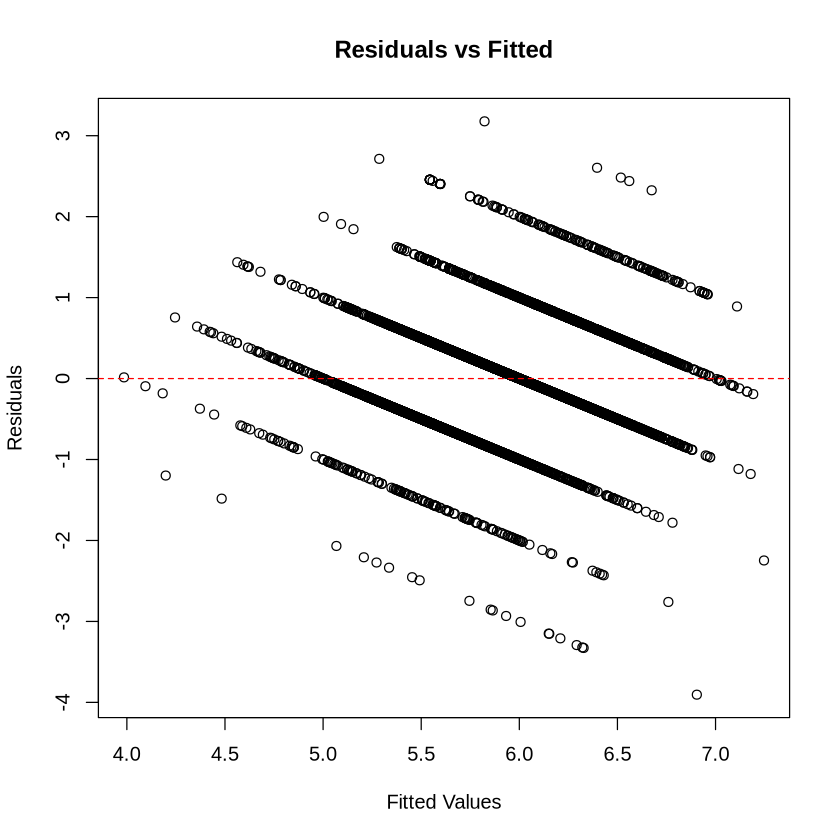

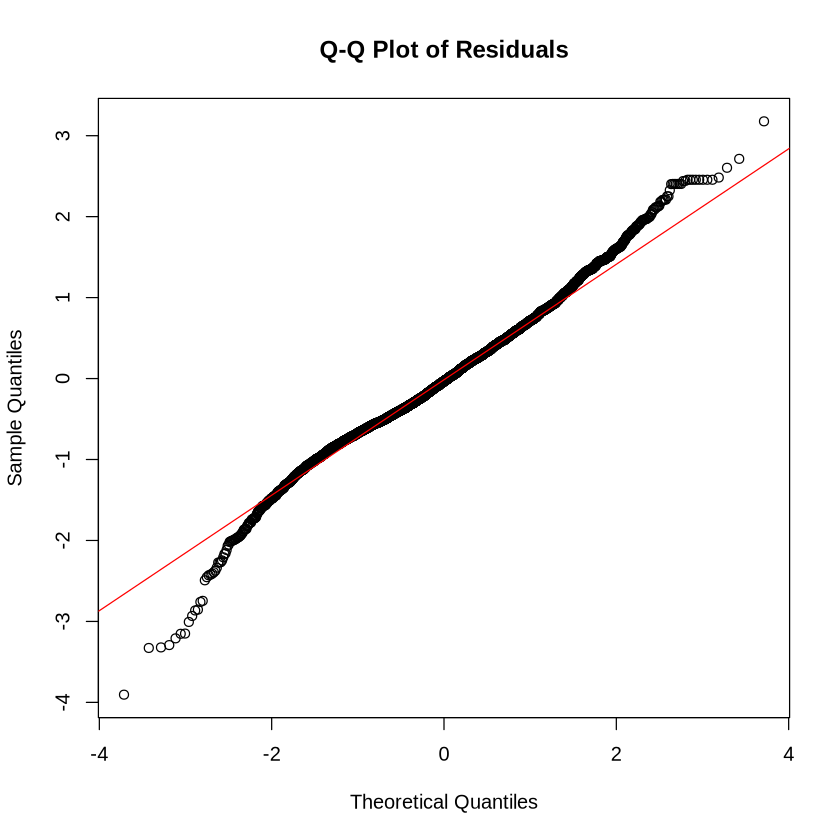

In [15]:
# Select the final model
final_selected <- lm(quality ~ alcohol+volatile.acidity+residual.sugar+free.sulfur.dioxide+fixed.acidity+sulphates+total.sulfur.dioxide+pH+chlorides, data = white)

# Extract fitted values
fitted_values <- fitted(final_selected)

# Extract residuals
residuals_values <- residuals(final_selected)

# Residual plot
plot(fitted_values, residuals_values,
     xlab = "Fitted Values", ylab = "Residuals",
     main = "Residuals vs Fitted")
abline(h = 0, col = "red", lty = 2)

# QQ plot
qqnorm(residuals_values, main = "Q-Q Plot of Residuals")
qqline(residuals_values, col = "red")  # Add a reference line

In [16]:
vif_final <- vif(final_selected)
print(vif_final)

             alcohol     volatile.acidity       residual.sugar 
            1.638098             1.096591             1.430814 
 free.sulfur.dioxide        fixed.acidity            sulphates 
            1.743408             1.277717             1.052652 
total.sulfur.dioxide                   pH            chlorides 
            2.146636             1.327365             1.186348 
